In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (15, 3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'
#import seaborn
import pickle

In [ ]:
pwd = os.getcwd()

In [11]:
with open('trip_df.pickle', 'rb') as handle:
    trip_df = pickle.load(handle)

# Speed 

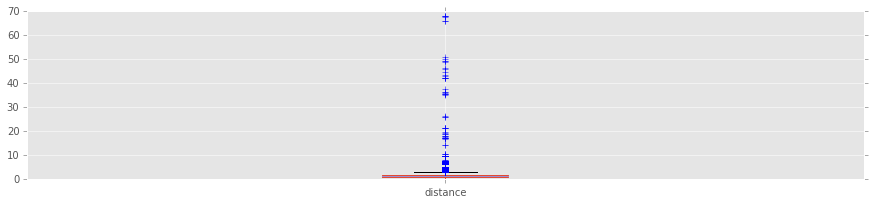

In [6]:
trip_df.boxplot(['distance'], return_type='axes')

In [10]:
trip_df[trip_df['distance']>=68]

,Bike #,Duration,end_date,End Station,End Terminal,start_date,Start Station,Start Terminal,Subscriber Type,Trip ID,...,end_lat_rad,end_lon_rad,dLON,dLAT,a1,a2,a3,a4,a,distance
70821,30,12088,2013-11-16 14:07:00,Civic Center BART (7th at Market),72,2013-11-16 10:46:00,San Jose Civic Center,3,Customer,98343,...,0.659392,-2.136508,0.009144,-0.007848,0.000015,0.790365,0.795149,0.000021,0.000029,68.023961


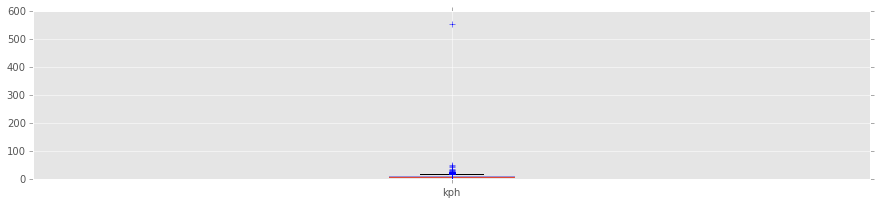

In [12]:
trip_df.boxplot(['kph'], return_type='axes')

In [13]:
# this doesn't look humanly possible, so let's remove this datapoint 
trip_df[trip_df['kph']>500]

,Bike #,Duration,end_date,End Station,End Terminal,start_date,Start Station,Start Terminal,Subscriber Type,Trip ID,...,end_lon_rad,dLON,dLAT,a1,a2,a3,a4,a,distance,kph
28563,232,236,2013-10-02 08:31:00,Civic Center BART (7th at Market),72,2013-10-02 08:27:00,Redwood City Caltrain Station,22,Subscriber,42493,...,-2.136508,0.003156,-0.005136,0.000007,0.790365,0.793501,0.000002,0.000008,36.368195,554.769073


In [14]:
trip_df = trip_df[trip_df['kph']<500]

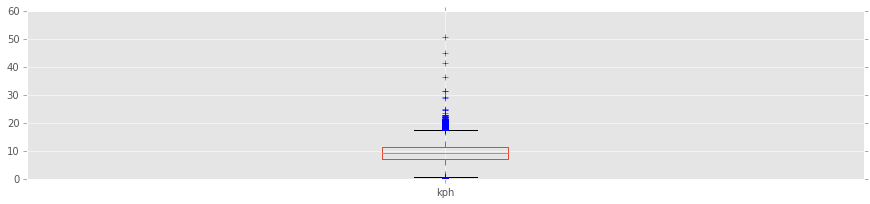

In [15]:
trip_df.boxplot(['kph'], return_type='axes')

In [16]:
trip_df[trip_df['kph']>40]

,Bike #,Duration,end_date,End Station,End Terminal,start_date,Start Station,Start Terminal,Subscriber Type,Trip ID,...,end_lon_rad,dLON,dLAT,a1,a2,a3,a4,a,distance,kph
109190,422,2525,2014-01-13 17:29:00,Redwood City Caltrain Station,22,2014-01-13 16:46:00,2nd at Townsend,61,Subscriber,151731,...,-2.133352,-0.002761,0.005139,0.000007,0.793501,0.790363,0.000002,0.000008,35.559243,50.698327
178048,705,3553,2014-07-29 19:32:00,San Francisco Caltrain (Townsend at 4th),70,2014-07-29 18:33:00,California Ave Caltrain Station,36,Subscriber,385606,...,-2.136200,0.004406,-0.006066,0.000009,0.790405,0.794106,0.000005,0.000012,44.558834,45.148270
282653,446,3237,2014-04-10 18:29:00,Redwood City Caltrain Station,22,2014-04-10 17:35:00,Commercial at Montgomery,45,Customer,244143,...,-2.133352,-0.002982,0.005378,0.000007,0.793501,0.790217,0.000002,0.000009,37.397851,41.591678


In [ ]:
# according to wikipedia 
# On a racing bicycle, a reasonably fit rider can ride at 40 km/h (25 mph) on flat ground for short periods
# meaning that we can assume that these trips were made by car (cycle transport) or the data is incorrect 


In [17]:
trip_df = trip_df[trip_df['kph']<40]

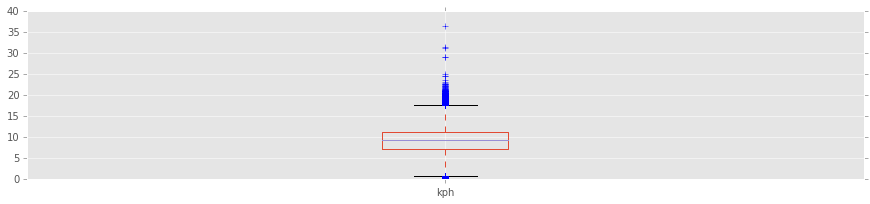

In [18]:
trip_df.boxplot(['kph'], return_type='axes')

In [19]:
# this starts to be beliavable so let's assume someone is really fit in San Fransisco
trip_df[trip_df['kph']>34]

,Bike #,Duration,end_date,End Station,End Terminal,start_date,Start Station,Start Terminal,Subscriber Type,Trip ID,...,end_lon_rad,dLON,dLAT,a1,a2,a3,a4,a,distance,kph
207899,561,246,2014-06-29 16:36:00,Townsend at 7th,65,2014-06-29 16:32:00,Embarcadero at Folsom,51,Subscriber,344040,...,-2.13633,0.000204,0.000356,3.171104e-08,0.790465,0.790246,1.039450e-08,3.820409e-08,2.488971,36.423959


In [21]:
# average speed
trip_df['kph'].mean()

8.811347383459195

# Route

In [22]:
routes = trip_df.groupby([trip_df['Start Station'], trip_df['End Station']]).count()

In [25]:
routes.reset_index(inplace=True)

In [29]:
routes['count'] = routes['Duration']

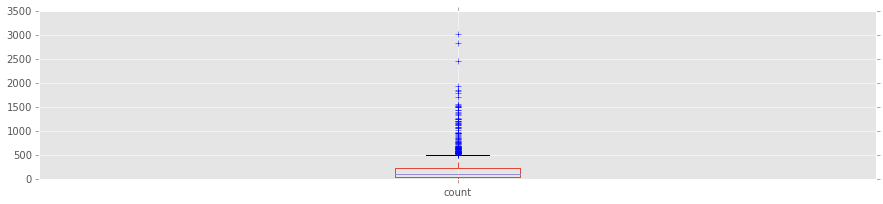

In [30]:
routes.boxplot(['count'], return_type='axes')

In [34]:
# most popular route
routes[routes['count']==routes['count'].max()]
most_popular_start = routes[routes['count']==routes['count'].max()]['Start Station']
most_popular_end = routes[routes['count']==routes['count'].max()]['End Station']

In [48]:
# average speed on the most popular route
most_popular_trips = trip_df[(trip_df['Start Station']==most_popular_start.values[0]) & (trip_df['End Station']==most_popular_end.values[0])]
most_popular_trips['kph'].mean()

7.963524459446054

In [49]:
most_popular_start.values[0], most_popular_end.values[0]

('Harry Bridges Plaza (Ferry Building)', 'Embarcadero at Sansome')